# Exploratory data analysis

Dataset used: https://huggingface.co/datasets/squad \\
Date: November 21, 2022

In [2]:
! pip install datasets
! pip install wordcloud
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import nltk
# Loading stopwords(English) from NLTK package
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from tqdm import tqdm
from tqdm.contrib import tzip

### Loading the dataset

In [4]:
dataset = load_dataset("squad")
train_set = dataset['train']
val_set = dataset['validation']

  0%|          | 0/2 [00:00<?, ?it/s]

### Analysing the training set

In [5]:
train_contexts = train_set['context']
train_questions = train_set['question']
train_answers = train_set['answers']

#### First lets see the average lenghts of the context, questions and answers in this dataset.

In [6]:
context_len, question_len, answer_count, answer_len = [], [], [], []
for context, question, answer in tzip(train_contexts, train_questions, train_answers):
  context_len.append(len(context.split(' ')))
  question_len.append(len(question.split(' ')))
  answer_count.append(len(answer['text']))
  answer_len.append(len(((' ').join(answer['text'])).split(' ')))

  0%|          | 0/87599 [00:00<?, ?it/s]

There is only one answer for each question in the train set

In [7]:
print(f'Number of answers for a question in the train set is {list(np.unique(answer_count))}')

Number of answers for a question in the train set is [1]


Checking the average length of the context in the train set

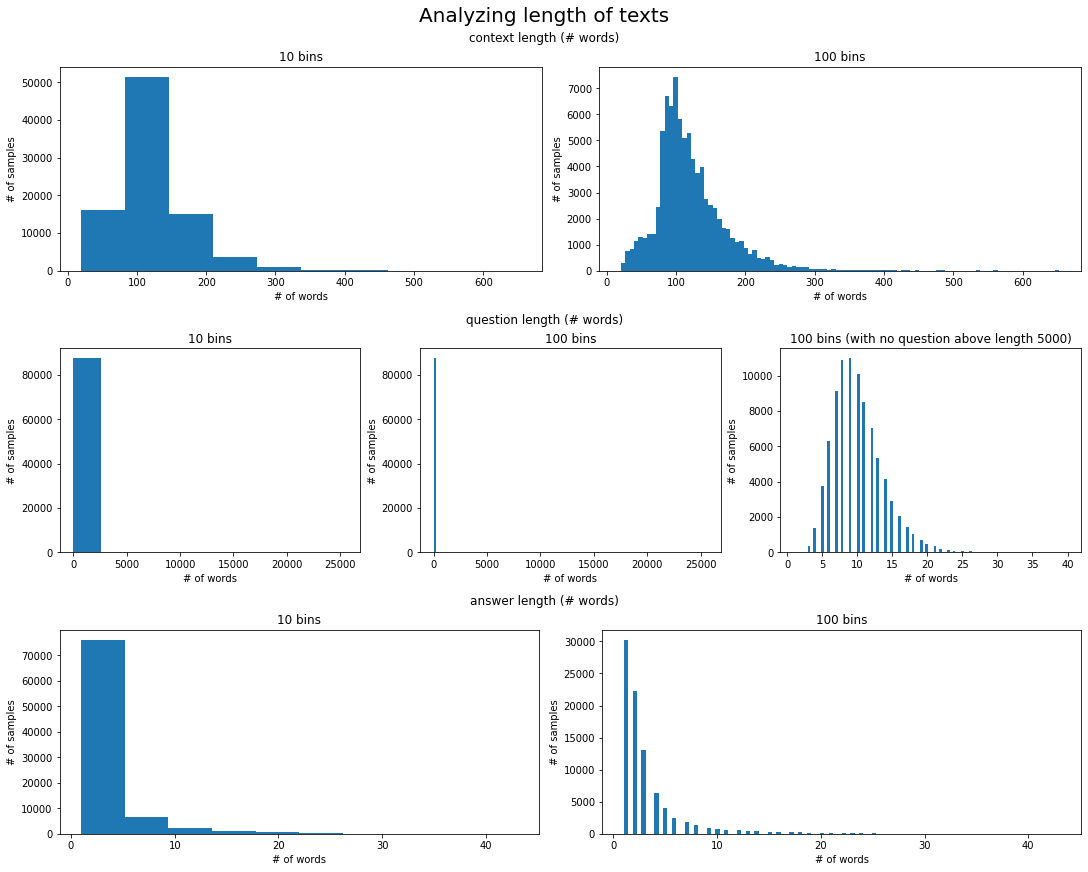

In [8]:
fig = plt.figure(figsize=(15, 12), constrained_layout=True)
fig.suptitle('Analyzing length of texts', fontsize=20)

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
text = [('context', context_len), ('question', question_len), ('answer', answer_len)]
for row, subfig in enumerate(subfigs):
  identifier, text_identifier = text[row]
  subfig.suptitle(f'{identifier} length (# words)', fontsize=12)
  if identifier == 'question':
    axs = subfig.subplots(nrows=1, ncols=3)     
    _ = axs[0].hist(text_identifier)
    axs[0].set_title('10 bins')
    axs[0].set_xlabel('# of words')
    axs[0].set_ylabel('# of samples')
    _ = axs[1].hist(text_identifier, bins = 100)
    axs[1].set_title('100 bins')
    axs[1].set_xlabel('# of words')
    axs[1].set_ylabel('# of samples')
    # because the density of questions with more than 5000 words is very less we can suppress it
    _ = axs[2].hist([l for l in text_identifier if l < 5000], bins = 100)
    axs[2].set_title('100 bins (with no question above length 5000)')
    axs[2].set_xlabel('# of words')
    axs[2].set_ylabel('# of samples')
  else:
    axs = subfig.subplots(nrows=1, ncols=2)     
    _ = axs[0].hist(text_identifier)
    axs[0].set_title('10 bins')
    axs[0].set_xlabel('# of words')
    axs[0].set_ylabel('# of samples')
    _ = axs[1].hist(text_identifier, bins = 100)
    axs[1].set_title('100 bins')
    axs[1].set_xlabel('# of words')
    axs[1].set_ylabel('# of samples')
plt.show()

#### We can see the word length distribution in the training set.

In [ ]:
context_word_len, question_word_len, answer_word_len = [], [], []
for context, question, answer in tzip(train_contexts, train_questions, train_answers):
  for c in context.split(' '):
    context_word_len.append(len(c))
  for q in question.split(' '):
    question_word_len.append(len(q))
  for a in (' ').join(answer['text']).split(' '):
    answer_word_len.append(len(a))

  0%|          | 0/87599 [00:00<?, ?it/s]

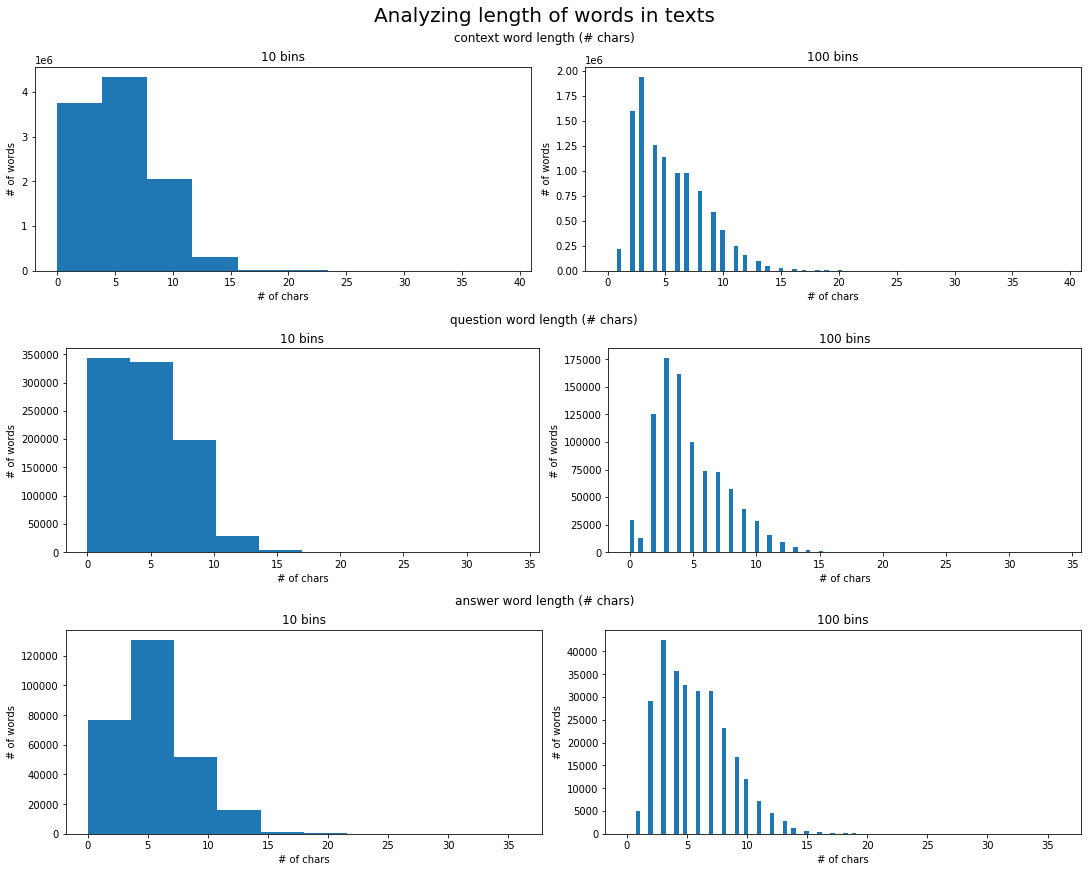

In [ ]:
fig = plt.figure(figsize=(15, 12), constrained_layout=True)
fig.suptitle('Analyzing length of words in texts', fontsize=20)

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
text = [('context', context_word_len), ('question', question_word_len), ('answer', answer_word_len)]
for row, subfig in enumerate(subfigs):
  identifier, text_identifier = text[row]
  subfig.suptitle(f'{identifier} word length (# chars)', fontsize=12)
  axs = subfig.subplots(nrows=1, ncols=2)     
  _ = axs[0].hist(text_identifier)
  axs[0].set_title('10 bins')
  axs[0].set_xlabel('# of chars')
  axs[0].set_ylabel('# of words')
  _ = axs[1].hist(text_identifier, bins = 100)
  axs[1].set_title('100 bins')
  axs[1].set_xlabel('# of chars')
  axs[1].set_ylabel('# of words')
plt.show()

We can do more analysis to see the top stopwords, bigrams, trigrams and their frequencies.

#### WordCloud

In [9]:
# downloading stop-words
nltk.download("all")
stop_words = stopwords.words('english')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [20]:
def wordcloud_for_list(texts: list, identifier: str):
  # making everything lower case in titles
  texts = [str(text).lower() for text in texts]
  clean_texts = []
  for t in texts:
    sp = ' '
    tok_t = t.split(sp)
    # removing stop words
    words_rmStop = [word for word in tok_t if word not in stop_words]
    # removing non-alphabetic characters
    word_tokens = [word for word in words_rmStop if word.isalpha()]
    ps = PorterStemmer()
    # stemming to reduce inflection in words
    words_stem = [ps.stem(word) for word in word_tokens]
    lemmatizer = nltk.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words_stem]
    clean_texts.append(sp.join(words))

  words = [word for title in clean_texts for word in title.split(' ')]
  joined_words = ' '.join(words)
  wordcloud = WordCloud(width=2000, height=1000).generate(joined_words)

  fig = plt.figure(figsize=(15, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Keywords in {identifier} text')
  plt.axis("off")
  plt.show()
  return

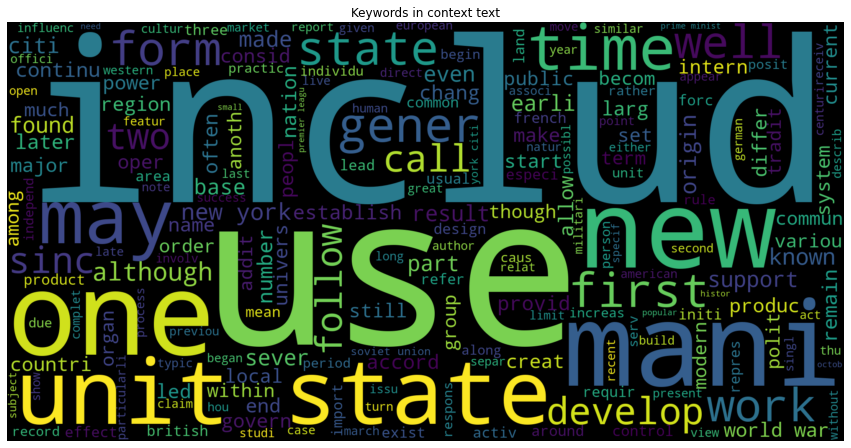

In [21]:
wordcloud_for_list(texts=train_contexts, identifier="context")

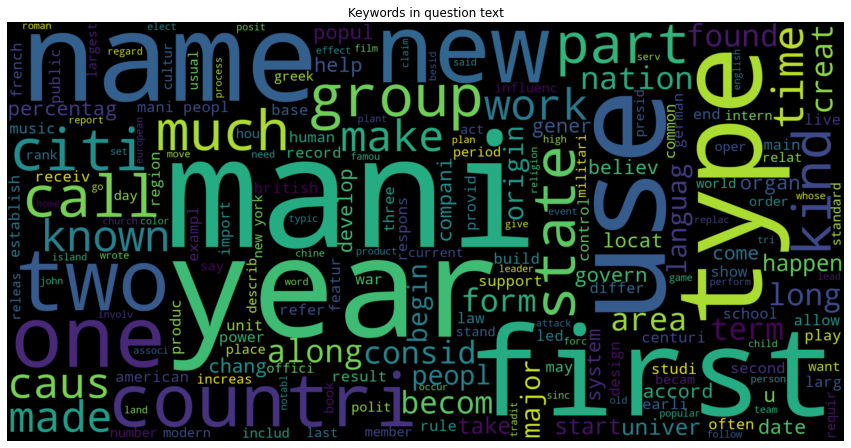

In [22]:
wordcloud_for_list(texts=train_questions, identifier="question")

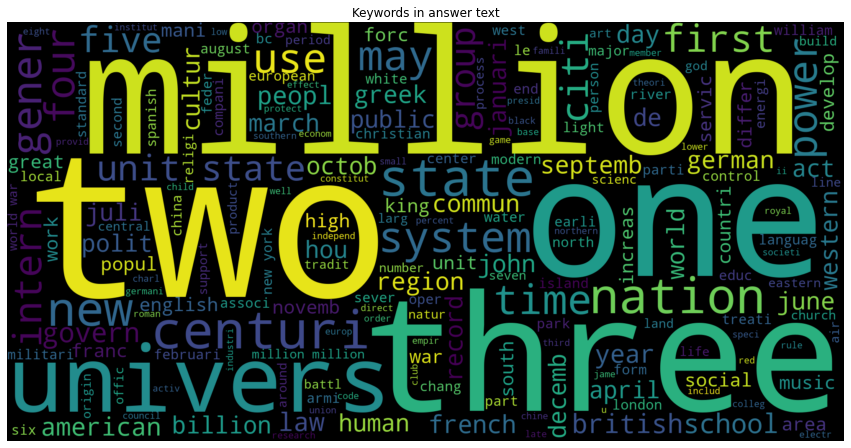

In [23]:
wordcloud_for_list(texts=[' '.join(t['text']) for t in train_answers], identifier="answer")

In [24]:
# END